# Задача 2

Два текста художественной литературы, написанных в разные эпохи (разница по
времени – не менее 100 лет). Тексты для сравнения должны быть написаны на одном языке (не переводные).

# Выбранные книги:



Энди Вейер. Марсианин


Герберт Уэллс. Война миров


In [1]:
!pip install textdescriptives

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.3/254.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.8 MB/s eta 0:00:00


In [16]:
import textdescriptives as td
import pandas as pd
import spacy

import nltk
from nltk.corpus import stopwords

from matplotlib import pylab as plt
import seaborn as sns
import numpy as np

In [7]:

from google.colab import drive
drive.mount('/content/gdrive')

with open(r'/content/gdrive/My Drive/data_stud/martian.txt', 'r', encoding='utf-8') as f:
    text1 = f.read()

with open(r'/content/gdrive/My Drive/data_stud/war.txt', 'r', encoding='utf-8') as f:
    text2 = f.read()

Mounted at /content/gdrive


In [19]:
spacy.cli.download("en_core_web_md")
nltk.download('stopwords')


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
nlp = spacy.load('en_core_web_md')
stopwords = set(nltk.corpus.stopwords.words('english')) #стоп-слова для английского
nlp.add_pipe('textdescriptives/all')

In [22]:
doc1 = nlp(text1)
doc2 = nlp(text2)

/usr/local/lib/python3.11/dist-packages/textdescriptives/components/coherence.py:44: UserWarning: [W008] Evaluating Span.similarity based on empty vectors.
  similarities.append(sent.similarity(sents[i + order]))
/usr/local/lib/python3.11/dist-packages/textdescriptives/components/information_theory.py:37: RuntimeWarning: overflow encountered in exp
  return np.exp(entropy)


In [25]:
tokens=[token.text for token in doc1]
print(len(tokens))

tokens=[token.text for token in doc2]
print(len(tokens))

#считаем количество получившихся токенов в двух текстах

139941
79431


In [42]:
import string

#фильтруем документы на предмет стоп-слов и пунктуации
filtered_doc1 = [token.text for token in doc1 if not token.is_stop]
filtered_doc1 = [x for x in filtered_doc1 if "\n" not in x]
filtered_doc1 = [x for x in filtered_doc1 if x not in string.punctuation not in x]

filtered_doc2 = [token.text for token in doc2 if not token.is_stop]
filtered_doc2 = [x for x in filtered_doc2 if "\n" not in x]
filtered_doc2 = [x for x in filtered_doc2 if x not in string.punctuation not in x]

In [43]:
print (filtered_doc1)

['Martian', 'Andy', 'Weir', 'Chapter', '1', 'LOG', 'ENTRY', 'SOL', '6', 'pretty', 'screwed', 'considered', 'opinion', 'Screwed', 'days', 'greatest', 'months', 'life', 'turned', 'nightmare', 'know', 'read', 'guess', 'find', 'eventually', 'Maybe', 'years', 'record', '...', 'die', 'Sol', '6', 'Certainly', 'rest', 'crew', 'thought', 'blame', 'Maybe', 'day', 'national', 'mourning', 'Wikipedia', 'page', '“', 'Mark', 'Watney', 'human', 'died', 'Mars', '”', 'right', 'probably', 'Cause', 'surely', 'die', 'Sol', '6', 'thinks', 'Let', '...', 'begin', 'Ares', 'program', 'Mankind', 'reaching', 'Mars', 'send', 'people', 'planet', 'time', 'expand', 'horizons', 'humanity', 'blah', 'blah', 'blah', 'Ares', '1', 'crew', 'thing', 'came', 'heroes', 'got', 'parades', 'fame', 'love', 'world', 'Ares', '2', 'thing', 'different', 'location', 'Mars', 'got', 'firm', 'handshake', 'hot', 'cup', 'coffee', 'got', 'home', 'Ares', '3', 'mission', 'se', 'Commander', 'Lewis', 'charge', 'crew', 'Actually', 'lowest', 'rank

In [51]:
word_frequencies1={} #ищем 100 самых частотных токенов для текста 1
for word in doc1:
            if word.text not in word_frequencies1.keys():
                word_frequencies1[word.text] = 1
            else:
                word_frequencies1[word.text] += 1

word_frequencies1 = {k: v for k, v in sorted(word_frequencies1.items(), key=lambda item: item[1], reverse=True)}

first100_1 = dict(list(word_frequencies1.items())[:100])

for key,value in first100_1.items():
    print(key, " : ", value)

.  :  9656

  :  5537
,  :  5291
the  :  5097


  :  4043
I  :  3762
to  :  3321
“  :  2977
”  :  2912
a  :  2154
it  :  1745
of  :  1728
and  :  1512
in  :  1255
said  :  928
The  :  823
is  :  803
?  :  801
’s  :  781
on  :  777
's  :  760
for  :  747
was  :  735
that  :  694
be  :  687
have  :  686
It  :  633
with  :  621
you  :  541
my  :  534
-  :  514
up  :  504
do  :  477
out  :  456
n’t  :  426
n't  :  420
can  :  416
get  :  408
we  :  400
but  :  398
as  :  390
he  :  389
all  :  387
from  :  376
:  :  371
at  :  365
me  :  354
time  :  352
Hab  :  342
!  :  340
had  :  338
'll  :  334
they  :  332
rover  :  331
But  :  322
not  :  321




  :  318
’ll  :  318
We  :  316
Venkat  :  308
would  :  293
an  :  283
his  :  281
this  :  280
them  :  277
back  :  276
just  :  271
'm  :  271
...  :  266
need  :  262
So  :  244
are  :  242
so  :  236
And  :  235
one  :  234
will  :  231
Lewis  :  231
That  :  229
way  :  225
there  :  220



  :  218
He  :  217
now  :  216
could  :  2

In [50]:
word_frequencies2={} #ищем 100 самых частотных токенов для текста 2
for word in doc2:
            if word.text not in word_frequencies2.keys():
                word_frequencies2[word.text] = 1
            else:
                word_frequencies2[word.text] += 1

word_frequencies2 = {k: v for k, v in sorted(word_frequencies2.items(), key=lambda item: item[1], reverse=True)}

first100_2 = dict(list(word_frequencies2.items())[:100])

for key,value in first100_2.items():
    print(key, " : ", value)


  :  4598
the  :  4590
,  :  4275
.  :  3212
and  :  2436
of  :  2400
a  :  1612
I  :  1293
to  :  1235
in  :  984


  :  900
was  :  856
that  :  768
had  :  568
it  :  519
with  :  482
as  :  417
my  :  414
“  :  412
”  :  412
at  :  385
on  :  371
were  :  367
The  :  362
-  :  333
from  :  328
for  :  319
—  :  291
he  :  281
me  :  269
by  :  267
this  :  266
they  :  244
;  :  243
his  :  237
out  :  234
or  :  224
have  :  224
not  :  221
’s  :  213
but  :  208
their  :  207
into  :  200
!  :  199
all  :  198
we  :  196
them  :  187
It  :  183
is  :  180
there  :  178
upon  :  174
one  :  172
about  :  171
been  :  171
up  :  167
said  :  166
no  :  163
so  :  162
Martians  :  160
be  :  159
him  :  156
its  :  152
came  :  151
people  :  149
He  :  147
an  :  142
over  :  136
And  :  130
towards  :  128
saw  :  127
down  :  127
through  :  123
man  :  122
time  :  122
?  :  119
you  :  118
could  :  118
little  :  111
again  :  109
some  :  108
which  :  106
black  :  106
are 

In [54]:
doc1._.descriptive_stats #статистика первого документа

{'n_tokens': 113748,
 'n_unique_tokens': 7715,
 'proportion_unique_tokens': 0.06782536835812497,
 'n_characters': 469968,
 'n_sentences': 10813,
 'token_length_mean': 3.866538312761543,
 'token_length_median': 3.0,
 'token_length_std': 2.244154292521316,
 'sentence_length_mean': 10.519559789142699,
 'sentence_length_median': 9.0,
 'sentence_length_std': 6.323130285856148,
 'syllables_per_token_mean': 1.2138587052080037,
 'syllables_per_token_median': 1.0,
 'syllables_per_token_std': 0.547202853271876}

In [56]:
doc2._.descriptive_stats #статистика второго документа

{'n_tokens': 69706,
 'n_unique_tokens': 7149,
 'proportion_unique_tokens': 0.10255932057498637,
 'n_characters': 298872,
 'n_sentences': 3323,
 'token_length_mean': 4.152555016784782,
 'token_length_median': 4.0,
 'token_length_std': 2.4285140902953657,
 'sentence_length_mean': 20.976828167318686,
 'sentence_length_median': 18.0,
 'sentence_length_std': 14.620067664139846,
 'syllables_per_token_mean': 1.2597193928786619,
 'syllables_per_token_median': 1.0,
 'syllables_per_token_std': 0.5949080516560368}

У 1 текста больше токенов, предложений. Средняя длина токена длиннее во втором тексте, как и длина среднего предложения.

In [57]:
print(doc1._.readability)
print(doc2._.readability)

{'flesch_reading_ease': 93.46520035342309, 'flesch_kincaid_grade': 2.836161039220098, 'smog': 6.9249849566698725, 'gunning_fog': 5.8866226637669365, 'automated_readability_index': 2.041175347678216, 'coleman_liau_index': 4.121439322010058, 'lix': 23.70484656341565, 'rix': 1.3870341255895682}
{'flesch_reading_ease': 78.97125877263676, 'flesch_kincaid_grade': 7.455651821222499, 'smog': 9.025424765631517, 'gunning_fog': 10.422120243486164, 'automated_readability_index': 8.616948212715666, 'coleman_liau_index': 7.205942673514475, 'lix': 38.60084905504715, 'rix': 3.6969605777911525}


Первый текст читается проще, чем второй.

In [58]:
print(doc1._.information_theory)
print(doc2._.information_theory)

{'entropy': 4585.551503258753, 'perplexity': inf, 'per_word_perplexity': inf}
{'entropy': 2569.564061932748, 'perplexity': inf, 'per_word_perplexity': inf}


Первый текст серьёзно сложнее второго.

In [60]:
df1 = td.extract_df(doc1)
df1.columns

df2 = td.extract_df(doc2)
df2.columns

Index(['text', 'entropy', 'perplexity', 'per_word_perplexity',
       'first_order_coherence', 'second_order_coherence',
       'flesch_reading_ease', 'flesch_kincaid_grade', 'smog', 'gunning_fog',
       'automated_readability_index', 'coleman_liau_index', 'lix', 'rix',
       'dependency_distance_mean', 'dependency_distance_std',
       'prop_adjacent_dependency_relation_mean',
       'prop_adjacent_dependency_relation_std', 'passed_quality_check',
       'n_stop_words', 'alpha_ratio', 'mean_word_length', 'doc_length',
       'symbol_to_word_ratio_#', 'proportion_ellipsis',
       'proportion_bullet_points', 'contains_lorem ipsum',
       'duplicate_line_chr_fraction', 'duplicate_paragraph_chr_fraction',
       'duplicate_ngram_chr_fraction_5', 'duplicate_ngram_chr_fraction_6',
       'duplicate_ngram_chr_fraction_7', 'duplicate_ngram_chr_fraction_8',
       'duplicate_ngram_chr_fraction_9', 'duplicate_ngram_chr_fraction_10',
       'top_ngram_chr_fraction_2', 'top_ngram_chr_fraction

([<matplotlib.patches.Wedge at 0x7fa3ca432c10>,
 [Text(1.0723800652527544, 0.24495100662887337, 'ADJ'),
  Text(0.700386786224728, 0.8482089068630424, 'ADP'),
  Text(0.09777146478487171, 1.0956462662163464, 'ADV'),
  Text(-0.2630706549789651, 1.0680795056965275, 'AUX'),
  Text(-0.5817964712960451, 0.9335485343502343, 'CCONJ'),
  Text(-0.9829850981156707, 0.4937006146264408, 'DET'),
  Text(-1.0972260878165347, 0.07806991875762608, 'INTJ'),
  Text(-0.9327856109803394, -0.5830188710050773, 'NOUN'),
  Text(-0.3571950274921248, -1.0403901731249197, 'PART'),
  Text(0.05763754772055534, -1.0984889226081258, 'PRON'),
  Text(0.5218916750657002, -0.9683124906233099, 'PROPN'),
  Text(0.6870103539537351, -0.8590790263767146, 'SCONJ'),
  Text(1.0070556351368645, -0.4425369450555364, 'VERB')])

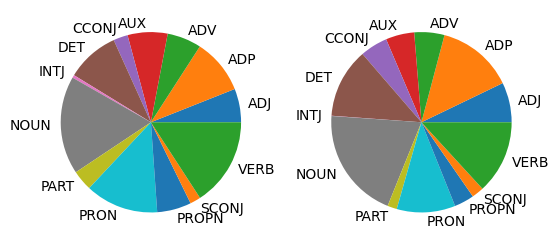

In [97]:
labels = ['pos_prop_ADJ',
       'pos_prop_ADP', 'pos_prop_ADV', 'pos_prop_AUX', 'pos_prop_CCONJ',
       'pos_prop_DET', 'pos_prop_INTJ', 'pos_prop_NOUN',
       'pos_prop_PART', 'pos_prop_PRON', 'pos_prop_PROPN',
       'pos_prop_SCONJ', 'pos_prop_VERB',]


values2 = []
values = []
for elem in labels:
  values2 += (df2[elem].tolist())

for elem in labels:
  values += (df1[elem].tolist())


for i in range(len(labels)):
  labels[i] = labels[i].replace('pos_prop_', '')

for i in range(len(labels)):
  labels[i] = labels[i].replace('pos_prop_', '')


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(values, labels=labels)
ax2.pie(values2, labels=labels)

Здесь видно небольшое различие в частотности некоторых частей речи. например, существительное частотнее во втором тексте. Местоимения чаще встречаются в первом тексте. Артиклей больше во втором тексте.

Можем сравнить чисто именные части речи:

([<matplotlib.patches.Wedge at 0x7fa3cee21250>,
 [Text(0.9876469029081401, 0.4843073354554513, 'ADJ'),
  Text(0.6226259283993576, 0.9068279623417212, 'NUM'),
  Text(0.09718152831589329, 1.095698749909932, 'ADJ'),
  Text(-1.0971536463158333, -0.07908145405764595, 'NOUN'),
  Text(0.4746208390102167, -0.9923381778291301, 'PRON'),
  Text(1.0716558832710568, -0.24810011658709716, 'PROPN')])

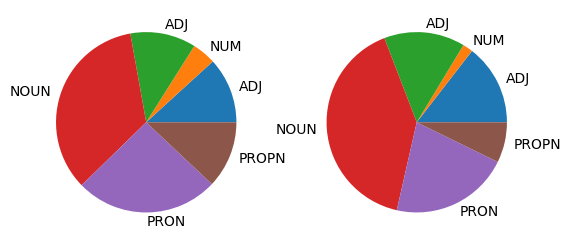

In [100]:
labels = ['pos_prop_ADJ',
       'pos_prop_NUM', 'pos_prop_ADJ', 'pos_prop_NOUN', 'pos_prop_PRON', 'pos_prop_PROPN',]


values2 = []
values = []
for elem in labels:
  values2 += (df2[elem].tolist())

for elem in labels:
  values += (df1[elem].tolist())


for i in range(len(labels)):
  labels[i] = labels[i].replace('pos_prop_', '')

for i in range(len(labels)):
  labels[i] = labels[i].replace('pos_prop_', '')


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(values, labels=labels)
ax2.pie(values2, labels=labels)

На этом графике видно, что в книге "Марсианин" автор чаще использует имя собственное и местоимения. Автор "Войны миров" же немного чаще использует прилагательные.

Или глагольные.

([<matplotlib.patches.Wedge at 0x7fa3d9e5fed0>,
 [Text(0.8483372555687522, 0.7002313195038321, 'ADJ'),
  Text(-0.35753950226512976, 1.0402718415491228, 'ADV'),
  Text(-1.072471124887752, 0.2445520114045266, 'AUX'),
  Text(-0.9983209077395514, -0.46190406489884706, 'PART'),
  Text(0.3235423460289576, -1.0513421661505251, 'VERB')])

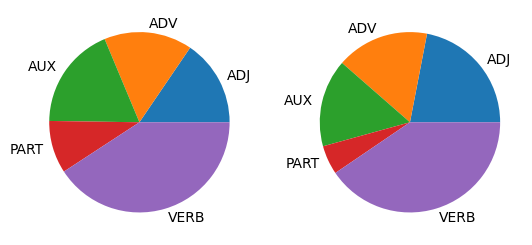

In [101]:
labels = ['pos_prop_ADJ',
       'pos_prop_ADV', 'pos_prop_AUX',
       'pos_prop_PART', 'pos_prop_VERB',]


values2 = []
values = []
for elem in labels:
  values2 += (df2[elem].tolist())

for elem in labels:
  values += (df1[elem].tolist())


for i in range(len(labels)):
  labels[i] = labels[i].replace('pos_prop_', '')

for i in range(len(labels)):
  labels[i] = labels[i].replace('pos_prop_', '')


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(values, labels=labels)
ax2.pie(values2, labels=labels)

Тут видно, что эти части речи у двух авторов распределены +- одинаково, разница только отношение VERB к PART

При желании так же можем вывести гистограммы некоторых наблюдений:

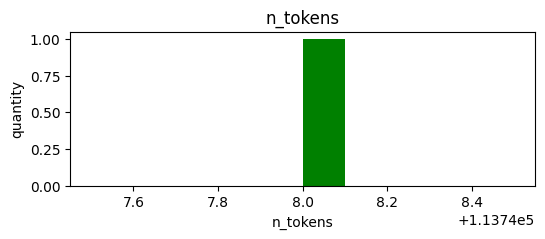

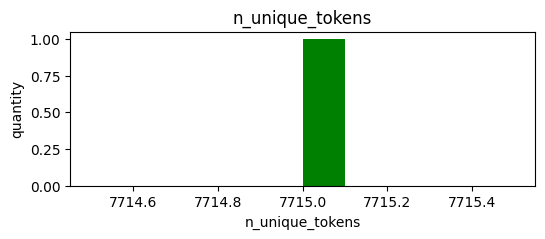

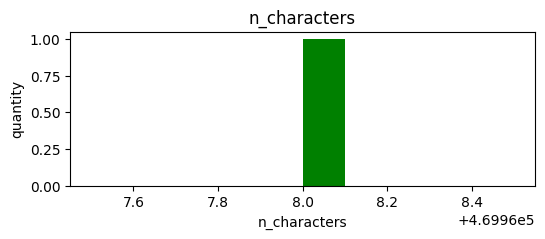

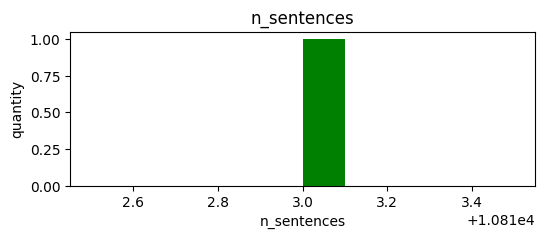

In [95]:
df_int = df1.select_dtypes(include = 'int64')
for column in df_int:
  plt.figure(figsize= (6, 2))
  plt.hist(df_int[column], bins=10, color='green')
  plt.title(f'{column}')
  plt.xlabel(column)
  plt.ylabel('quantity')
  plt.show()

In [94]:
for key in first100_1.keys() & first100_2.keys():
    print(key, first100_1[key], first100_2[key])

He 217 147
And 235 130
way 225 94
had 338 568
with 621 482
They 199 100
- 514 333
up 504 167
this 280 266
as 390 417
! 340 199

 5537 4598
The 823 362


 4043 900
. 9656 3212
his 281 237
time 352 122
no 177 163
it 1745 519
It 633 183
there 220 178
for 747 319
would 293 101
we 400 196
so 236 162
all 387 198
said 928 166
me 354 269
be 687 159
they 332 244
one 234 172
that 694 768
, 5291 4275
in 1255 984
out 456 234
? 801 119
on 777 371
of 1728 2400
to 3321 1235
a 2154 1612
but 398 208
my 534 414
about 199 171
an 283 142
the 5097 4590
have 686 224
I 3762 1293
could 214 118
’s 781 213
at 365 385
now 216 95
are 242 104
is 803 180
from 376 328
“ 2977 412
them 277 187
he 389 281
and 1512 2436
” 2912 412
you 541 118
not 321 221
was 735 856


Этот метод выводит слова, которые входят в топ-100 для каждого из текстов, и следом выводит их частотность для каждого из текстов.

Оба текста очень удачные для сравнения, так как оба являются представителями жанра научной фантастики. Оба произведения связаны с планетой Марс (хоть это слово и не попало в 100 самых частотных для "Войны миров", оно попало у книги "Марсианин" с 197 вхождениями. Зато в список частотных слов "Войны миров" попало слово "Марсиане"), в обоих повествование ведётся от первого лица (и даже так, на графиках было видно, что в книге "Марсианин" частотность личных местоимений явно больше, чем в книге "Война миров") Из полученных данных видно, что "Война миров", как более старое произведение, обладает более грузным языком, более длинными словами и предложениями. Но также можно предположить, что тем не менее "Война миров" не обладает какой-то более сложной научной терминологией, чем "Марсианин" (что можно предположить по графе information_theory).

"? 801 119" - из этой строчки можно сделать вывод, что протагонист "Марсианина" гораздо чаще задаётся вопросами, чем протагонист "Войны миров". Восклицаний в "Марсианине" тоже сильно больше.